# Adaboost ou XGBoost ?

Deux algorithmes de boosting connus sont Adaboost & XGBoost, voyons voir la performance de chacun de ces algorithmes sur le dataset d'AIRBNB Seattle. Notre but va être de prédire le prix d'un appartement en fonction des caractéristiques qu'on nous a donné. 

1. Importez les librairies usuelles 

2. Importez le dataset ```listings.csv```

Saving reviews.csv to reviews.csv
Saving listings.csv to listings.csv
['reviews.csv', 'listings.csv']


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


3. On a beaucoup de données dans ce dataset. Affichez toutes les colonnes du dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

4. Révisons un peu Seaborn, affichez la distribution des prix dans le dataset 

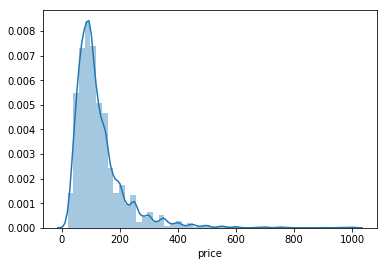

5. Supprimez les outliers pour ne garder que les appartements qui ont un prix inférieur à 400$/nuit 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.755000e+03,3.755000e+03,3.755000e+03,3753.000000,3753.000000,3755.000000,3755.000000,3755.000000,3739.000000,3749.000000,...,3119.000000,3108.000000,3113.000000,3108.000000,3115.000000,3111.000000,3110.000000,0.0,3755.000000,3138.000000
mean,5.556910e+06,2.016010e+13,1.579411e+07,7.146283,7.146283,47.628887,-122.332935,3.272703,1.236026,1.270739,...,94.517153,9.635135,9.552843,9.784106,9.807705,9.607522,9.452412,NaN,2.944607,2.096539
std,2.966011e+06,0.000000e+00,1.459490e+07,28.711382,28.711382,0.043270,0.031759,1.868531,0.556459,0.824873,...,6.597540,0.700417,0.801180,0.599360,0.571147,0.629853,0.749495,NaN,5.882812,1.827941
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.256584e+06,2.016010e+13,3.258368e+06,1.000000,1.000000,47.609078,-122.354154,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.700000
50%,6.127974e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623451,-122.328750,2.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.560000
75%,8.047928e+06,2.016010e+13,2.592334e+07,3.000000,3.000000,47.662976,-122.310698,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.020000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


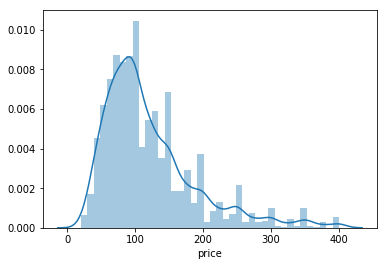

6. Exprimez le prix en fonction des variables suivantes : 

- ```room type```
- ```beds```
- ```property type```

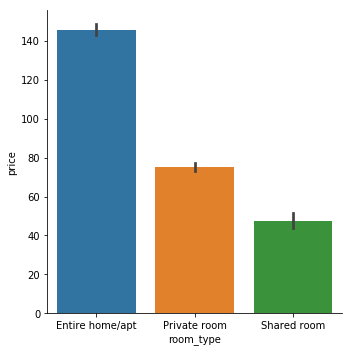

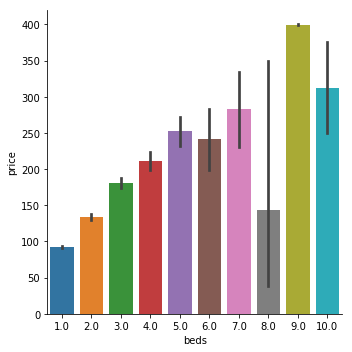

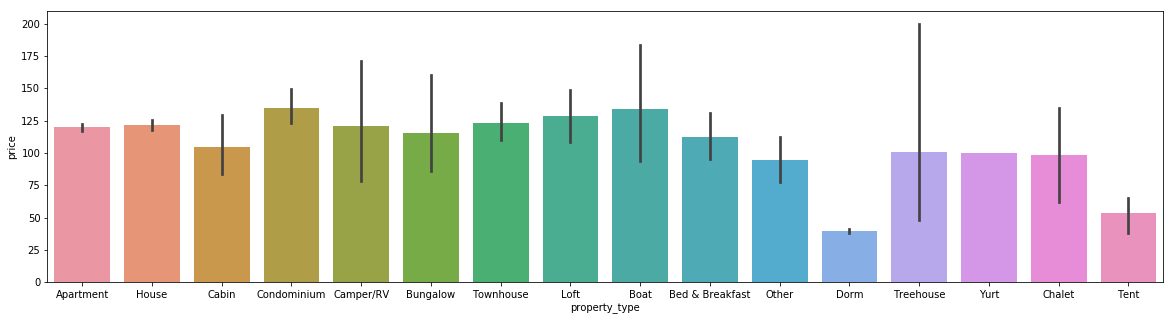

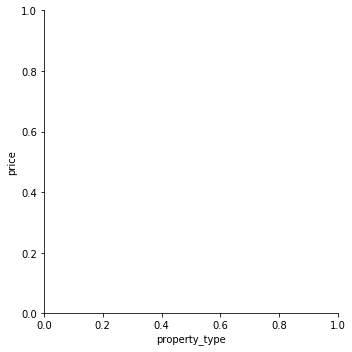

7. Séparez la variable cible de votre dataset

8. Il faut qu'on écrème quelques variables explicatives de notre jeu de données. Commencer par simplement enlever les variables qui expriment un ```id``` quelconque ou urls. On enlèvera également les variables qui contiennent des textes longs comme ```notes```

De la même manière, on enlèvera  toutes les variables qui décrivent le prix mensuel ou hebdomadaire comme  ```monthly price```

Votre dataset devrait contenir uniquement les variables catégoriques et numériques une fois votre nettoyage fait. 

A la fin, votre dataset contiendra les variables suivantes : 

```
Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')
```

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'license',
       'instant_bookable', 'cancellation_policy',
     

9. Gérez les valeurs NaN. Utilisez les stratégies que vous préférez 

host_response_time                   True
host_response_rate                   True
host_acceptance_rate                 True
host_is_superhost                    True
host_neighbourhood                   True
host_listings_count                  True
host_total_listings_count            True
host_has_profile_pic                 True
host_identity_verified               True
neighbourhood_group_cleansed        False
zipcode                              True
latitude                            False
longitude                           False
property_type                        True
room_type                           False
accommodates                        False
bathrooms                            True
bedrooms                             True
beds                                 True
bed_type                            False
square_feet                          True
security_deposit                     True
cleaning_fee                         True
guests_included                   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 3817
Data columns (total 48 columns):
host_response_time                  3755 non-null object
host_response_rate                  3755 non-null float64
host_acceptance_rate                3755 non-null float64
host_is_superhost                   3755 non-null object
host_neighbourhood                  3755 non-null object
host_listings_count                 3755 non-null float64
host_total_listings_count           3755 non-null float64
host_has_profile_pic                3755 non-null object
host_identity_verified              3755 non-null object
neighbourhood_group_cleansed        3755 non-null object
zipcode                             3748 non-null object
latitude                            3755 non-null float64
longitude                           3755 non-null float64
property_type                       3755 non-null object
room_type                           3755 non-null object
accommodates                    

10. Vérifiez que toutes les variables numériques le sont effectivement bien. (N'oubliez pas de regarder y)

11. Faites votre dernière partie de preprocessing en dummyfiant les variables catégoriques 

12. Faites maintenant un ```train_test_split```

13. Normalisez ```X_train``` & ```X_test```

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


14. Entrainez d'abord un modèle d'Adaboost standard et regardez votre score 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.39617619127209813

15. Entrainez ensuite un modèle XGBoost et regardez votre score 

0.6281307244443659

16. Par défaut, Adaboost prend des decision trees comme modèle a booster. Tentez de mettre une regression linéaire 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-2.1943458198312368e+17

17. La régression linéaire n'était pas la meilleure idée mais peut être qu'on peut faire une grid_search sur le ```learning rate``` & ```n_estimators```pour rattraper le score de XGBoost ?

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 50, 70, 100, 150, 200], 'learning_rate': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'learning_rate': 1.0, 'n_estimators': 200}

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.49078434974719043